# Another source of variance

### Loading our data

Let's work with our Airbnb dataset again.  We have already cleaned our data, so we just need to load it into our notebook, and then can feed it into a decision tree.

In [2]:
import json
with open('types.json', 'r') as f:
    data_types = json.load(f)

import pandas as pd
df = pd.read_feather('cleaned_df.feather')
X = df.drop(columns=['price'])
y = df.price

#### Training our trees

In [6]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.40, random_state=42)

from sklearn.tree import DecisionTreeRegressor
dtr_1 = DecisionTreeRegressor(max_depth=4)
dtr_1.fit(X_train_1, y_train_1)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

2. The second tree

Now let's train a second tree the same way.  To ensure our tree is different than the first, we'll  train on a different subset of the data by changing the value of our random state.

In [7]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.40, random_state=21)
from sklearn.tree import DecisionTreeRegressor
dtr_2 = DecisionTreeRegressor(max_depth=4)
dtr_2.fit(X_train_2, y_train_2)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Comparing our trees

Ok, now let's compare our two trees.  As we'll see below, there is even a degree of variance in the early layers of the tree.

In [8]:
from plot_tree import plot_tree

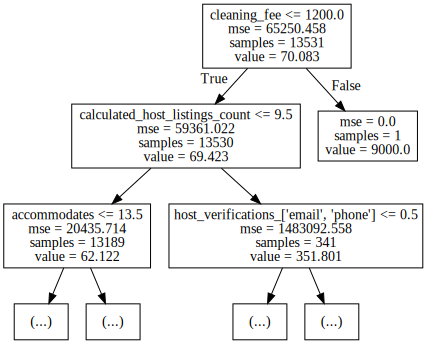

In [9]:
b

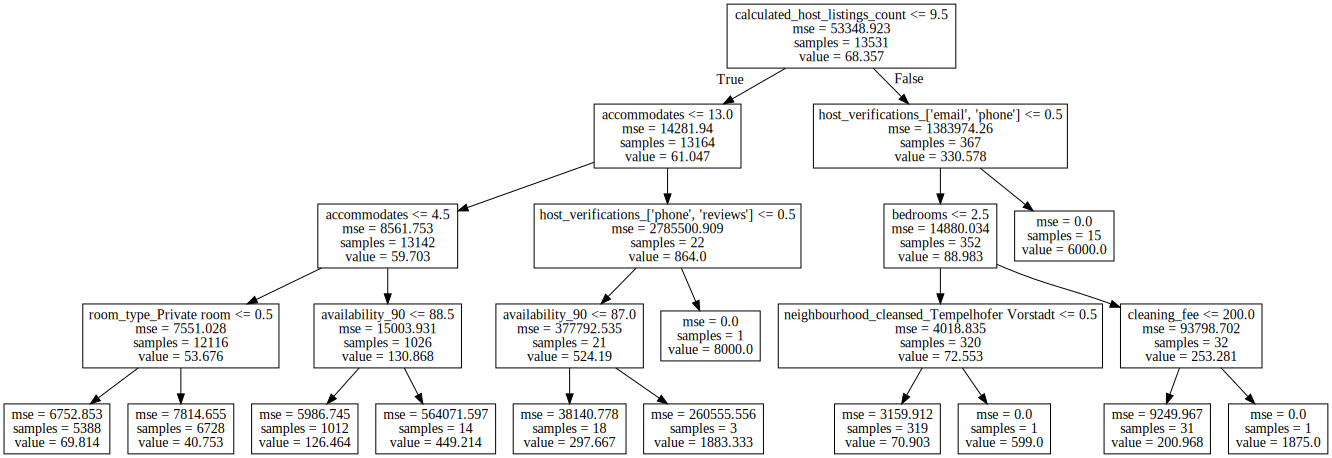

In [15]:
plot_tree(dtr_2, X.columns, max_depth=None)

### Viewing the different predictions

Let's take a look at the different predictions of our two trees.

> Below we select ten datapoints that are not in training sets of either tree.

In [12]:
import numpy as np
ten_in_both_tests = np.array([221,  7922, 17116, 11118,  2497,  4199,  8692,  5348, 14548, 1455])
ten_X = X.iloc[ten_in_both_tests, :]
ten_y = y[ten_in_both_tests]

> Now let's find the predictions of the two trees.

In [13]:
dtr_1_predictions = dtr_1.predict(ten_X)
dtr_2_predictions = dtr_2.predict(ten_X)
df_predictions = pd.DataFrame({'dtr_1_predictions': dtr_1_predictions, 
                               'dtr_2_predictions': dtr_2_predictions, 'ten_y': ten_y.to_numpy()})
df_predictions

,dtr_1_predictions,dtr_2_predictions,ten_y
0,51.46048,69.814031,63.0
1,51.46048,40.752675,20.0
2,51.46048,69.814031,45.0
3,51.46048,69.814031,40.0
4,51.46048,40.752675,22.0
5,106.64289,126.464427,95.0
6,51.46048,40.752675,43.0
7,51.46048,40.752675,25.0
8,51.46048,69.814031,42.0
9,51.46048,69.814031,100.0


### Recognize the Variance

1. Even more variance 

2. Why variant 
    * Few assumptions 
    * Greedy approach
    
3. Correcting for Variance